In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [165]:
full_dataset = pd.read_excel("./fulldataset.xlsx", index_col=False)
full_dataset["AGE"] = full_dataset["AGE"].str.strip(" years")
full_dataset["HEIGHT"] = full_dataset["HEIGHT"].str.strip(" cm")
full_dataset["WEIGHT"] = full_dataset["WEIGHT"].str.strip(" kg")

full_dataset[["AGE", "HEIGHT", "WEIGHT", "TIME(min)", "C-Peptide", "ISR"]] = full_dataset[["AGE", "HEIGHT", "WEIGHT", "TIME(min)", "C-Peptide", "ISR"]].astype("float64")
full_dataset["BMI"] = full_dataset["WEIGHT"] / (full_dataset["HEIGHT"]/100)**2
full_dataset["BSA"] = np.sqrt((full_dataset["HEIGHT"] * full_dataset["WEIGHT"]) / 3600)
full_dataset

,sample,Sample ID,AGE,HEIGHT,SEX,SUBJECT,WEIGHT,TIME(min),C-Peptide,ISR,BMI,BSA
0,CONT1,1,53.0,163.1,F,normal,77.1,0.0,610.0,1.76,28.983208,1.868973
1,CONT1,1,53.0,163.1,F,normal,77.1,15.0,480.0,1.46,28.983208,1.868973
2,CONT1,1,53.0,163.1,F,normal,77.1,75.0,5190.0,20.30,28.983208,1.868973
3,CONT1,1,53.0,163.1,F,normal,77.1,135.0,4110.0,10.51,28.983208,1.868973
4,CONT1,1,53.0,163.1,F,normal,77.1,180.0,NaN,NaN,28.983208,1.868973
...,...,...,...,...,...,...,...,...,...,...,...,...
3301,DIAB7,176,64.0,179.4,M,NIDDM,81.1,135.0,3730.0,12.71,25.198575,2.010344
3302,DIAB7,176,64.0,179.4,M,NIDDM,81.1,255.0,3550.0,11.91,25.198575,2.010344
3303,DIAB7,176,64.0,179.4,M,NIDDM,81.1,315.0,4530.0,13.15,25.198575,2.010344
3304,DIAB7,176,64.0,179.4,M,NIDDM,81.1,375.0,4050.0,12.43,25.198575,2.010344


In [132]:
full_dataset_cleaned = full_dataset.dropna(subset=["ISR"], how="all")
full_dataset_cleaned.sample(40)


,sample,Sample ID,AGE,HEIGHT,SEX,SUBJECT,WEIGHT,TIME(min),C-Peptide,ISR,BMI,BSA
2297,AUG13,115,54.0,183.0,M,NIDDM,112.4,0.0,1280.0,6.16,33.563260,2.390328
3263,DIAB2,171,38.0,179.9,M,NIDDM,110.7,315.0,5000.0,13.76,34.204661,2.352004
1579,MARC6,77,41.0,177.0,M,NIDDM,83.1,14.0,830.0,7.60,26.524945,2.021324
2363,AUG16,118,54.0,170.0,F,NIDDM,80.2,60.0,1190.0,18.78,27.750865,1.946079
2181,DEC7,108,42.0,164.4,F,normal,63.2,40.0,790.0,3.38,23.383712,1.698862
250,SEP1,17,64.0,176.4,M,obese,97.7,6.0,1060.0,8.76,31.397669,2.187990
1418,MARC14,70,65.0,170.0,M,NIDDM,75.2,12.0,860.0,2.82,26.020761,1.884439
3227,APR9,168,57.0,170.0,M,NIDDM,107.1,60.0,1020.0,8.69,37.058824,2.248889
409,SEP8,26,50.0,179.5,M,NIDDM,83.1,0.0,210.0,3.31,25.791234,2.035549
1409,MARC13,69,42.0,168.5,M,NIDDM,73.6,74.0,6090.0,32.32,25.922567,1.856041


In [294]:
model_dataset = full_dataset_cleaned.dropna(subset=["C-Peptide"], how="all").copy()
model_dataset.drop(columns=["Sample ID"], inplace=True)
model_dataset.columns.unique()
model_dataset = pd.get_dummies(model_dataset, columns=["SEX", "SUBJECT"])
model_dataset = model_dataset[model_dataset["C-Peptide"] > 0]
model_dataset


,sample,AGE,HEIGHT,WEIGHT,TIME(min),C-Peptide,ISR,BMI,BSA,SEX_F,SEX_M,SUBJECT_NIDDM,SUBJECT_normal,SUBJECT_obese
0,CONT1,53.0,163.1,77.1,0.0,610.0,1.76,28.983208,1.868973,True,False,False,True,False
1,CONT1,53.0,163.1,77.1,15.0,480.0,1.46,28.983208,1.868973,True,False,False,True,False
2,CONT1,53.0,163.1,77.1,75.0,5190.0,20.30,28.983208,1.868973,True,False,False,True,False
3,CONT1,53.0,163.1,77.1,135.0,4110.0,10.51,28.983208,1.868973,True,False,False,True,False
7,CONT1,53.0,163.1,77.1,255.0,3230.0,10.30,28.983208,1.868973,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,DIAB7,64.0,179.4,81.1,135.0,3730.0,12.71,25.198575,2.010344,False,True,True,False,False
3302,DIAB7,64.0,179.4,81.1,255.0,3550.0,11.91,25.198575,2.010344,False,True,True,False,False
3303,DIAB7,64.0,179.4,81.1,315.0,4530.0,13.15,25.198575,2.010344,False,True,True,False,False
3304,DIAB7,64.0,179.4,81.1,375.0,4050.0,12.43,25.198575,2.010344,False,True,True,False,False


In [176]:
correlations = model_dataset.corr()["C-Peptide"].sort_values(ascending=False)
correlations

C-Peptide         1.000000
ISR               0.778356
BMI               0.220802
WEIGHT            0.194949
BSA               0.160473
TIME(min)         0.071938
AGE              -0.009270
HEIGHT           -0.015802
SUBJECT_obese    -0.030737
SUBJECT_normal   -0.067801
SEX_M            -0.089643
Name: C-Peptide, dtype: float64

In [274]:
model_dataset


,sample,AGE,HEIGHT,WEIGHT,TIME(min),C-Peptide,ISR,BMI,BSA,SEX_M,SUBJECT_normal,SUBJECT_obese
0,CONT1,53.0,163.1,77.1,0.0,610.0,1.76,28.983208,1.868973,False,True,False
1,CONT1,53.0,163.1,77.1,15.0,480.0,1.46,28.983208,1.868973,False,True,False
2,CONT1,53.0,163.1,77.1,75.0,5190.0,20.30,28.983208,1.868973,False,True,False
3,CONT1,53.0,163.1,77.1,135.0,4110.0,10.51,28.983208,1.868973,False,True,False
7,CONT1,53.0,163.1,77.1,255.0,3230.0,10.30,28.983208,1.868973,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3301,DIAB7,64.0,179.4,81.1,135.0,3730.0,12.71,25.198575,2.010344,True,False,False
3302,DIAB7,64.0,179.4,81.1,255.0,3550.0,11.91,25.198575,2.010344,True,False,False
3303,DIAB7,64.0,179.4,81.1,315.0,4530.0,13.15,25.198575,2.010344,True,False,False
3304,DIAB7,64.0,179.4,81.1,375.0,4050.0,12.43,25.198575,2.010344,True,False,False


In [295]:
preprocessing = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), ["ISR", "BMI", "WEIGHT", "BSA"])
])
c_pep_none = full_dataset_cleaned[full_dataset_cleaned["C-Peptide"].isna()]
y = np.log1p(model_dataset["C-Peptide"])
X = model_dataset[["ISR", "BMI", "WEIGHT", "BSA"]]

X_test = c_pep_none[["ISR", "BMI", "WEIGHT", "BSA"]]

model_pipeline = Pipeline(steps=[
    ("scale", preprocessing),
    ("model", XGBRegressor(n_estimators=400, max_depth=10, learning_rate=0.05, subsample=1))
])

model_pipeline.fit(X, y)

predictions = model_pipeline.predict(X_test)

predictions = np.expm1(predictions)
c_pep = pd.DataFrame(predictions)
c_pep.rename(columns={0: "C-Peptide"}, inplace=True)
c_pep
c_pep_none = pd.get_dummies(c_pep_none, columns=["SUBJECT", "SEX"])
replaced = c_pep_none.copy()
replaced.drop(columns=["C-Peptide"], inplace=True)
replaced = replaced.reset_index(drop=True)
final_cpep = pd.concat([replaced, c_pep], axis=1)
final_cpep



,sample,Sample ID,AGE,HEIGHT,WEIGHT,TIME(min),ISR,BMI,BSA,SUBJECT_NIDDM,SUBJECT_normal,SUBJECT_obese,SEX_F,SEX_M,C-Peptide
0,CONT1,1,53.0,163.1,77.1,195.0,7.42,28.983208,1.868973,False,True,False,True,False,1981.237305
1,CONT1,1,53.0,163.1,77.1,225.0,8.72,28.983208,1.868973,False,True,False,True,False,1695.811646
2,CONT2,2,45.0,152.0,73.0,195.0,7.39,31.596260,1.755626,False,True,False,True,False,1972.187744
3,CONT2,2,45.0,152.0,73.0,225.0,6.34,31.596260,1.755626,False,True,False,True,False,954.109009
4,CONT3,3,65.0,177.9,106.3,195.0,4.25,33.587785,2.291941,False,True,False,True,False,1375.421753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,JANB1,89,49.0,158.0,85.4,65.0,6.66,34.209261,1.936004,False,False,True,True,False,1370.866455
361,JANB1,89,49.0,158.0,85.4,72.0,5.34,34.209261,1.936004,False,False,True,True,False,1036.907104
362,JANB1,89,49.0,158.0,85.4,74.0,5.29,34.209261,1.936004,False,False,True,True,False,1087.611816
363,JANB1,89,49.0,158.0,85.4,76.0,5.26,34.209261,1.936004,False,False,True,True,False,1026.950439


In [296]:
real_dataset = pd.concat([model_dataset, final_cpep])
real_model_dataset = real_dataset.copy()
real_model_dataset.drop(columns=["Sample ID"], inplace=True)
real_model_dataset
df = real_model_dataset
df

,sample,AGE,HEIGHT,WEIGHT,TIME(min),C-Peptide,ISR,BMI,BSA,SEX_F,SEX_M,SUBJECT_NIDDM,SUBJECT_normal,SUBJECT_obese
0,CONT1,53.0,163.1,77.1,0.0,610.000000,1.76,28.983208,1.868973,True,False,False,True,False
1,CONT1,53.0,163.1,77.1,15.0,480.000000,1.46,28.983208,1.868973,True,False,False,True,False
2,CONT1,53.0,163.1,77.1,75.0,5190.000000,20.30,28.983208,1.868973,True,False,False,True,False
3,CONT1,53.0,163.1,77.1,135.0,4110.000000,10.51,28.983208,1.868973,True,False,False,True,False
7,CONT1,53.0,163.1,77.1,255.0,3230.000000,10.30,28.983208,1.868973,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,JANB1,49.0,158.0,85.4,65.0,1370.866455,6.66,34.209261,1.936004,True,False,False,False,True
361,JANB1,49.0,158.0,85.4,72.0,1036.907104,5.34,34.209261,1.936004,True,False,False,False,True
362,JANB1,49.0,158.0,85.4,74.0,1087.611816,5.29,34.209261,1.936004,True,False,False,False,True
363,JANB1,49.0,158.0,85.4,76.0,1026.950439,5.26,34.209261,1.936004,True,False,False,False,True


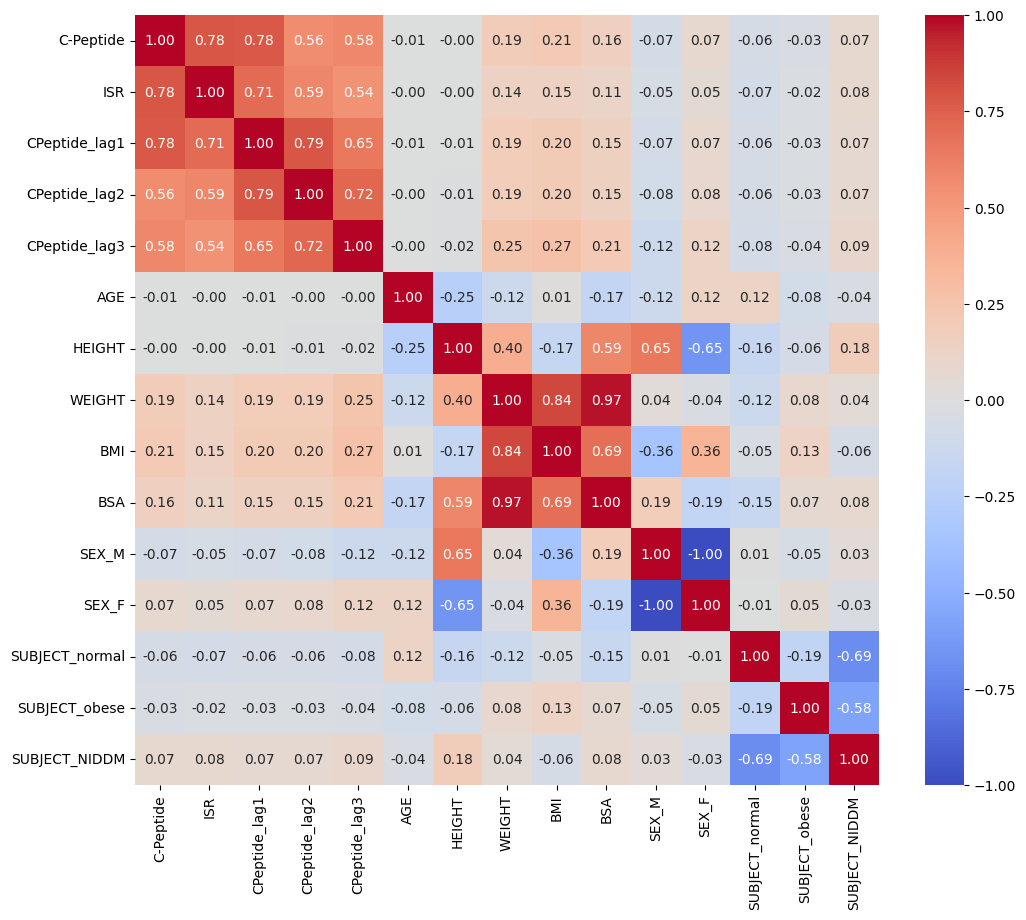

In [300]:
def create_lag_features(df, lags=3):
    df_lag = df.copy()
    for lag in range(1, lags + 1):
        df_lag[f"CPeptide_lag{lag}"] = df_lag.groupby("sample")["C-Peptide"].shift(lag)
    return df_lag.dropna()

df_lagged = create_lag_features(df)
features = ["C-Peptide", "ISR", "CPeptide_lag1", "CPeptide_lag2", "CPeptide_lag3", 'AGE', 'HEIGHT', 'WEIGHT', 'BMI', 'BSA', 'SEX_M', "SEX_F", 'SUBJECT_normal', 'SUBJECT_obese', "SUBJECT_NIDDM"]
X_rf = df_lagged[features]
y_rf = df_lagged["ISR"]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42
)

X_rf

correlations = X_rf.corr()["ISR"].sort_values(ascending=False)
correlations


plt.figure(figsize=(12, 10))  # width=12 inches, height=10 inches

corr_matrix = X_rf.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size":10})
plt.show()

# rf_model = RandomForestRegressor(
#     n_estimators=200,
#     max_depth=10,
#     random_state=42
# )

# rf_model.fit(X_train_rf, y_train_rf)
# rf_pred = rf_model.predict(X_test_rf)

# print("Random Forest RMSE:",
#       np.sqrt(mean_squared_error(y_test_rf, rf_pred)))